# **Assignment 3 - Pollution Levels Prediction**
### **Andrei Sumin**

The health department of a region has noticed that pollution indicators have drastically increased. The regional
government, concerned about this situation, has decided to implement a prediction model to predict the concentration
on carbon monoxide in the air from the date gathered by the air-quality monitors.
In this assignment, you will use regression techniques in order to predict the CO concentration based on temporal,
climatic and environmental data.
The health department has agreed upon the evaluation of the prediction in terms of the Mean Absolute Error (MAE).

---

## Exploratory Data Analysis

We begin by loading the dataset.

In [138]:
# Importing commonly used modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy 
import scipy.stats as stats
import pickle

In [139]:
# Load the dataset
data_df = pd.read_csv("pollution.csv")

data_df.head()

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox
0,23,13.0,43.0,1.0,19.0,29.0,7.6,1021.3,0.0,NNW,2.5,23-Oct-2014,200.000
1,21,77.0,115.0,31.0,74.0,10.0,0.0,1015.0,0.0,W,0.7,9-Jan-2016,2100.000
2,21,86.0,141.0,9.0,43.0,198.0,29.3,1000.9,0.0,SSE,0.4,11-Jul-2016,700.000
3,11,NaN,NaN,NaN,NaN,20.0,14.2,1015.2,0.0,ESE,1.9,29-Oct-2015,1222.923
4,0,77.0,57.0,41.0,48.0,16.0,-1.0,1024.2,0.0,SSW,1.3,7-Feb-2015,1300.000


**Dataset content**:
| Item | Attribute               | Type                  | Values                                                |
|------|-------------------------|-----------------------|------------------------------------------------------|
| 1    | hr                     | Numerical/Categorical | hour (0-24)               |
| 2    | small part             | Numerical             | Fine particulate matter concentration (µg/m³)       |
| 3    | med part               | Numerical             | Particulate matter concentration (µg/m³)            |
| 4    | sulf diox              | Numerical             | Sulfur dioxide concentration (µg/m³)                |
| 5    | nitr diox              | Numerical             | Nitrogen dioxide concentration (µg/m³)              |
| 6    | trioxygen              | Numerical             | Ozone concentration (µg/m³)                         |
| 7    | temp                   | Numerical             | Temperature (°C)                     |
| 8    | pres                   | Numerical             | Pressure (hPa)                             |
| 9    | rain                   | Numerical             | Precipitation (mm)                              |
| 10   | wind                   | Categorical           | E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE, SSW, SW, W, WNW, WSW |
| 11   | wind sp                | Numerical             | Wind speed (m/s)                                |
| 12   | date                   | Categorical           | day-month-year                                |


**Target class**:
carb monox: CO concentration (µg/m³)

The dataset contains hourly information of weather and environmental conditions in a time period from 2014 to
2018.

The target attribute is the carbon monoxide concentration (carb monox).

- Number of instances: 14000
- Number of attributes: 12

In [140]:
# Show basic information about the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        14000 non-null  int64  
 1   small_part  13668 non-null  float64
 2   med_part    13749 non-null  float64
 3   sulf_diox   13691 non-null  float64
 4   nitr_diox   13662 non-null  float64
 5   trioxygen   13563 non-null  float64
 6   temp        13985 non-null  float64
 7   pres        13986 non-null  float64
 8   rain        13985 non-null  float64
 9   wind        13955 non-null  object 
 10  wind_sp     13989 non-null  float64
 11  date        14000 non-null  object 
 12  carb_monox  14000 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.4+ MB


In [141]:
# Show summary statistics for numerical columns in the dataset
data_df.describe()

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind_sp,carb_monox
count,14000.000000,13668.000000,13749.000000,13691.000000,13662.000000,13563.000000,13985.000000,13986.000000,13985.000000,13989.000000,14000.000000
mean,11.622429,78.745237,103.551407,16.060271,52.454812,57.334871,13.758687,1009.740036,0.067265,1.756351,1233.604101
std,6.935469,80.126449,91.394438,21.762748,35.094642,56.569558,11.427620,10.529981,0.815876,1.238664,1174.657678
min,0.000000,2.000000,2.000000,0.285600,2.000000,0.214200,-15.900000,982.400000,0.000000,0.000000,100.000000
25%,6.000000,20.000000,35.000000,3.000000,25.000000,11.000000,3.300000,1001.000000,0.000000,0.900000,500.000000
50%,12.000000,53.000000,79.000000,7.996800,44.980350,45.000000,14.800000,1009.400000,0.000000,1.400000,900.000000
75%,18.000000,110.000000,144.000000,19.000000,73.000000,81.590900,23.400000,1018.000000,0.000000,2.200000,1400.000000
max,23.000000,713.000000,992.000000,229.000000,277.000000,423.000000,39.800000,1042.000000,33.700000,10.000000,10000.000000


We will identify the null values in the dataset.

In [142]:
# Count missing values in each column
data_df.isnull().sum()

hour            0
small_part    332
med_part      251
sulf_diox     309
nitr_diox     338
trioxygen     437
temp           15
pres           14
rain           15
wind           45
wind_sp        11
date            0
carb_monox      0
dtype: int64

Eliminating rows with missing data would result in a substantial data loss.
For numerical data, missing values will be filled with column means. For categorical data (`wind`), the most common value will be used.

In [143]:
# Fill or drop missing input features (optional: mean, median, or drop)
data_df = data_df.fillna(data_df.mean())

# Calculate the mode (most common value) of the 'wind' column
most_common_value = data_df['wind'].mode()[0]

# Replace missing values in the 'wind' column with the mode
data_df['wind'] = data_df['wind'].fillna(most_common_value)

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [144]:
data_df.isnull().sum()

hour          0
small_part    0
med_part      0
sulf_diox     0
nitr_diox     0
trioxygen     0
temp          0
pres          0
rain          0
wind          0
wind_sp       0
date          0
carb_monox    0
dtype: int64

All missing data has been filled.

We will verify if all values are correctly formatted and convertible to date format.

In [145]:
# Find problematic dates
invalid_dates = []
for date in data_df['date']:
    try:
        pd.to_datetime(date, format='%d-%b-%Y')
    except Exception as e:
        invalid_dates.append(date)

print("Invalid dates found:", invalid_dates)

Invalid dates found: ['29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017', '29-Feb-2017']


2017 was not a leap year, so February 29 did not exist. Rows with this invalid date will be removed.

In [146]:
# Drop rows with invalid dates
data_df = data_df[~data_df['date'].isin(['29-Feb-2017'])]

We will convert the date into three separate categorical variables: `day`, `month`, and `year`.

In [147]:
# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'], format='%d-%b-%Y')

# Extract year, month, and day from the 'date' column
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df['day'] = data_df['date'].dt.day

# Drop the original 'date' column
data_df = data_df.drop(columns='date')

data_df.head()

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,carb_monox,year,month,day
0,23,13.000000,43.000000,1.000000,19.000000,29.0,7.6,1021.3,0.0,NNW,2.5,200.000,2014,10,23
1,21,77.000000,115.000000,31.000000,74.000000,10.0,0.0,1015.0,0.0,W,0.7,2100.000,2016,1,9
2,21,86.000000,141.000000,9.000000,43.000000,198.0,29.3,1000.9,0.0,SSE,0.4,700.000,2016,7,11
3,11,78.745237,103.551407,16.060271,52.454812,20.0,14.2,1015.2,0.0,ESE,1.9,1222.923,2015,10,29
4,0,77.000000,57.000000,41.000000,48.000000,16.0,-1.0,1024.2,0.0,SSW,1.3,1300.000,2015,2,7


### Categorical Variables

Now we will focus on categorical data. We will visualize its relationship with the target variable `carb_monox` using scatterplots and boxplots.

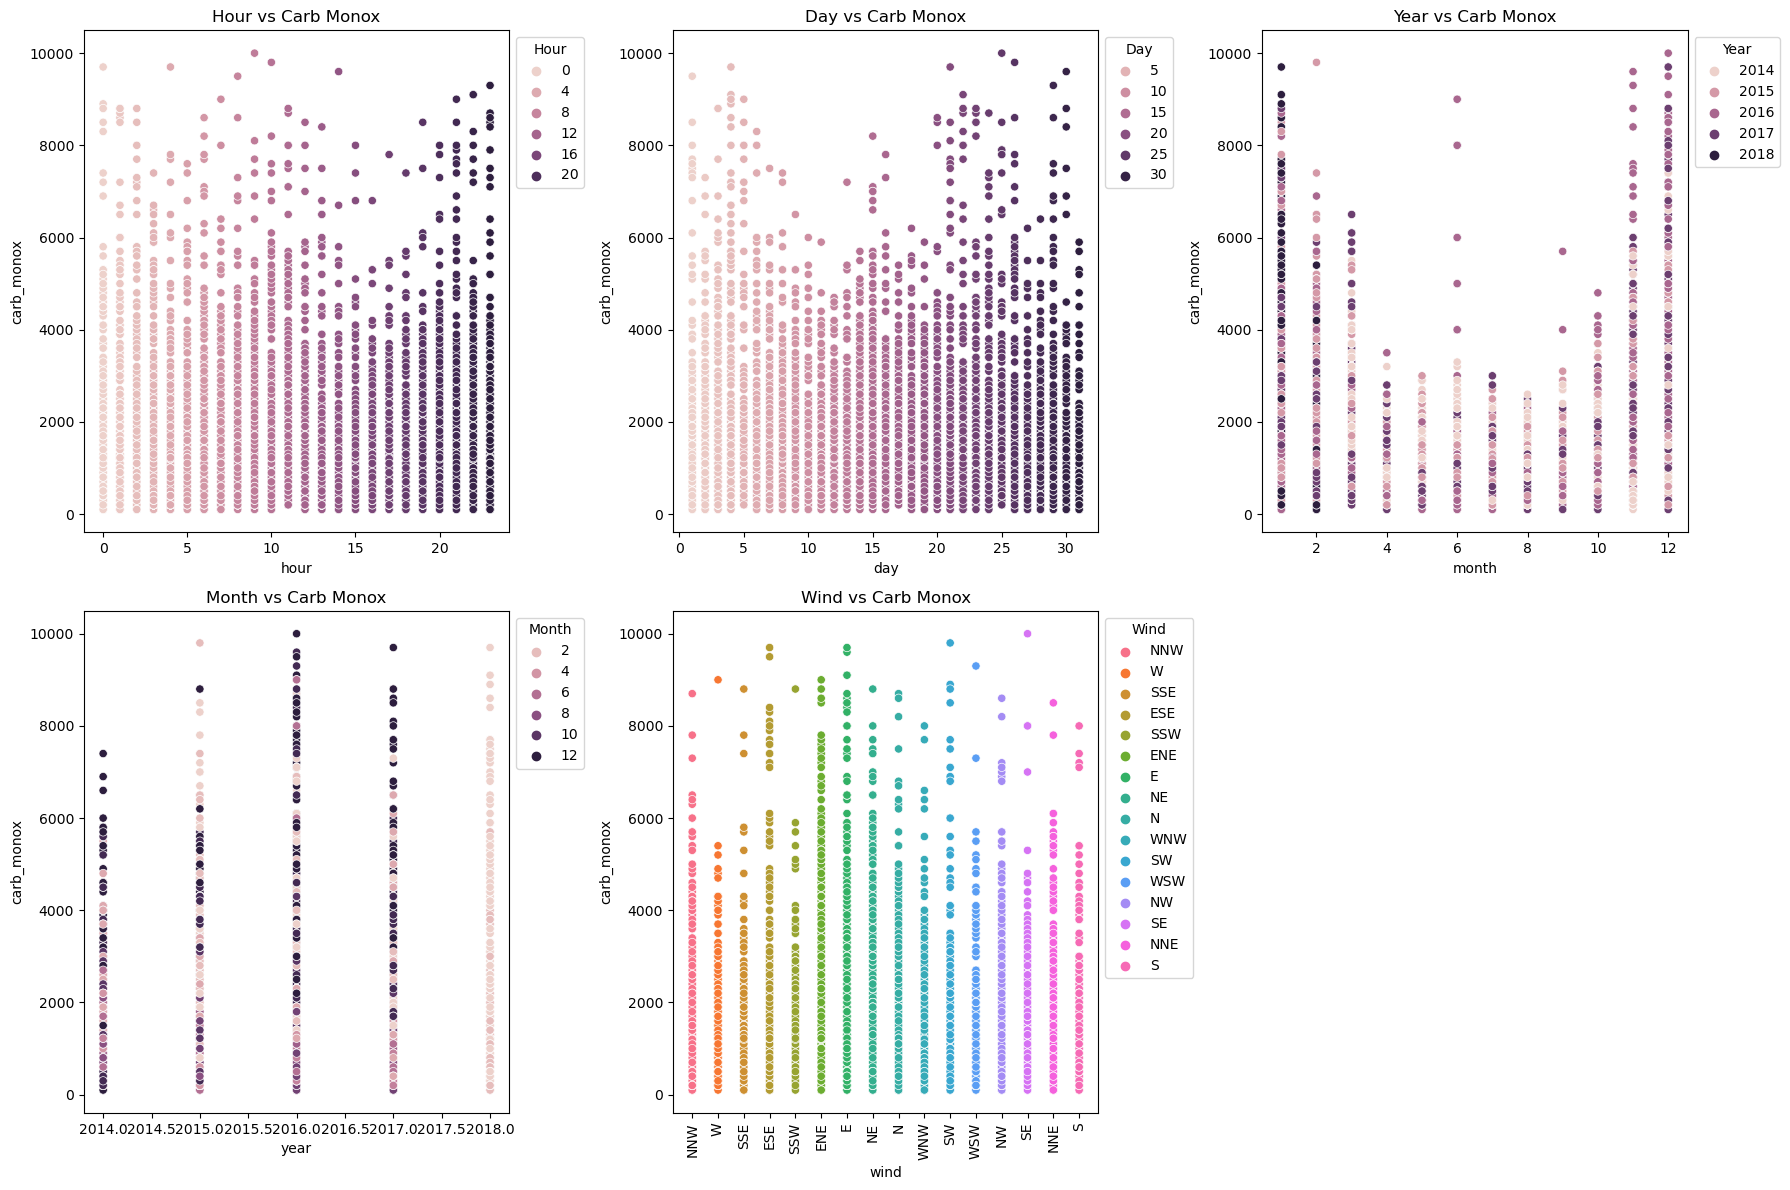

In [148]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot for "hour" vs "carb_monox"
sns.scatterplot(ax=axes[0, 0], x="hour", y="carb_monox", hue="hour", data=data_df)
axes[0, 0].set_title("Hour vs Carb Monox")
legend = axes[0, 0].legend(title="Hour", loc='upper left', bbox_to_anchor=(1, 1))

# Plot for "day" vs "carb_monox"
sns.scatterplot(ax=axes[0, 1], x="day", y="carb_monox", hue="day", data=data_df)
axes[0, 1].set_title("Day vs Carb Monox")
legend = axes[0, 1].legend(title="Day", loc='upper left', bbox_to_anchor=(1, 1))

# Plot for "year" vs "carb_monox"
sns.scatterplot(ax=axes[0, 2], x="month", y="carb_monox", hue="year", data=data_df)
axes[0, 2].set_title("Year vs Carb Monox")
legend = axes[0, 2].legend(title="Year", loc='upper left', bbox_to_anchor=(1, 1))

# Plot for "month" vs "carb_monox"
sns.scatterplot(ax=axes[1, 0], x="year", y="carb_monox", hue="month", data=data_df)
axes[1, 0].set_title("Month vs Carb Monox")
legend = axes[1, 0].legend(title="Month", loc='upper left', bbox_to_anchor=(1, 1))

# Plot for "wind" vs "carb_monox"
sns.scatterplot(ax=axes[1, 1], x="wind", y="carb_monox", hue="wind", data=data_df)
axes[1, 1].set_title("Wind vs Carb Monox")
legend = axes[1, 1].legend(title="Wind", loc='upper left', bbox_to_anchor=(1, 1))
axes[1, 1].tick_params(axis='x', rotation=90)

# Hide the empty subplot (bottom-right corner in 2x3 layout)
axes[1, 2].axis("off")


plt.tight_layout()
plt.show()

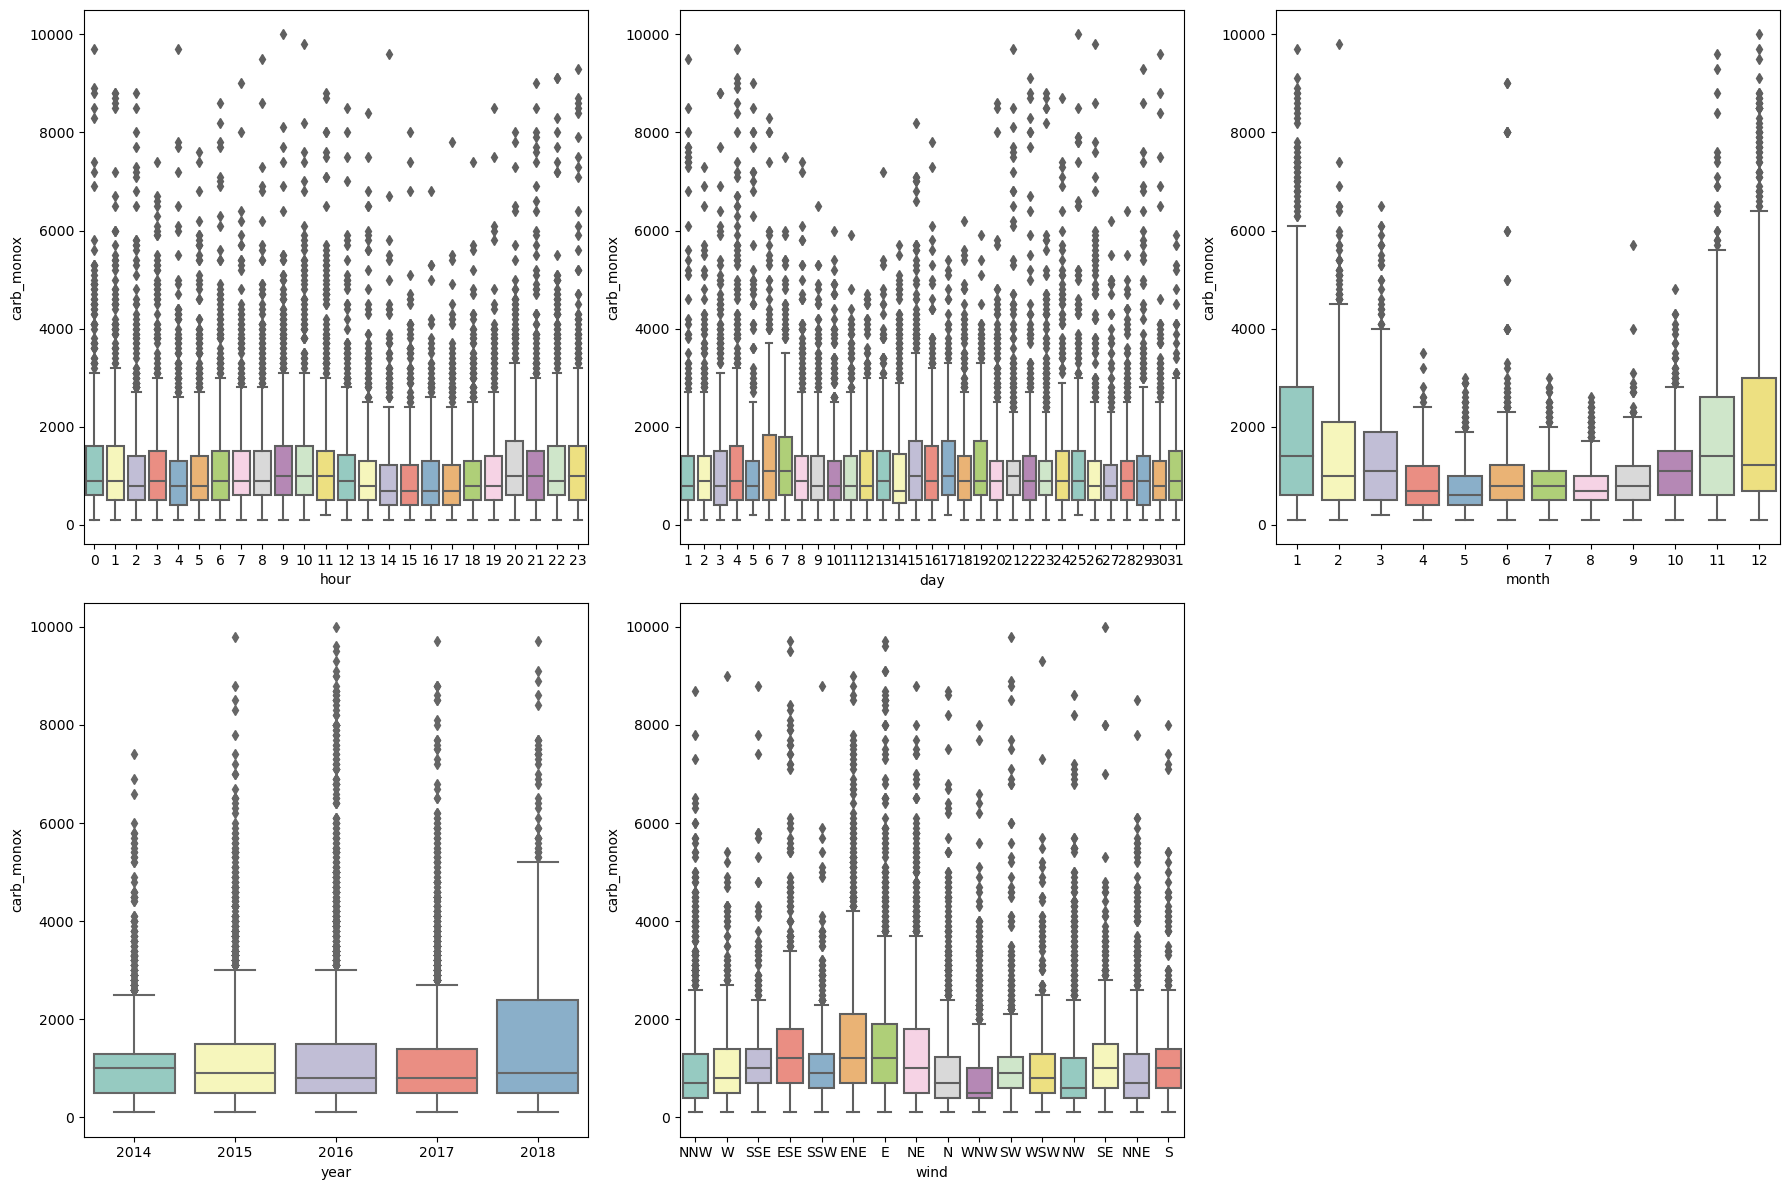

In [149]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Boxplots of categorical variables
sns.boxplot(ax=axes[0, 0], data=data_df, x="hour", y="carb_monox", palette="Set3")
sns.boxplot(ax=axes[0, 1], data=data_df, x="day", y="carb_monox", palette="Set3")
sns.boxplot(ax=axes[0, 2], data=data_df, x="month", y="carb_monox", palette="Set3")
sns.boxplot(ax=axes[1, 0], data=data_df, x="year", y="carb_monox", palette="Set3")
sns.boxplot(ax=axes[1, 1], data=data_df, x="wind", y="carb_monox", palette="Set3")


# Hide the empty subplot (bottom-right corner in 2x3 layout)
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

We will encode all categorical variables using one-hot encoding, dropping the first category to avoid multicollinearity.

In [150]:
categorical_df_dummies = pd.get_dummies(data_df[['wind','year','month','day','hour']].astype(str),drop_first=True)

categorical_df_dummies.head()

,wind_ENE,wind_ESE,wind_N,wind_NE,wind_NNE,wind_NNW,wind_NW,wind_S,wind_SE,wind_SSE,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Continous Variables

Now we will focus on the numerical data.


In [151]:
numerical_df = data_df.drop(columns=['wind','year','month','day','hour']).copy()

numerical_df.head()

,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind_sp,carb_monox
0,13.000000,43.000000,1.000000,19.000000,29.0,7.6,1021.3,0.0,2.5,200.000
1,77.000000,115.000000,31.000000,74.000000,10.0,0.0,1015.0,0.0,0.7,2100.000
2,86.000000,141.000000,9.000000,43.000000,198.0,29.3,1000.9,0.0,0.4,700.000
3,78.745237,103.551407,16.060271,52.454812,20.0,14.2,1015.2,0.0,1.9,1222.923
4,77.000000,57.000000,41.000000,48.000000,16.0,-1.0,1024.2,0.0,1.3,1300.000


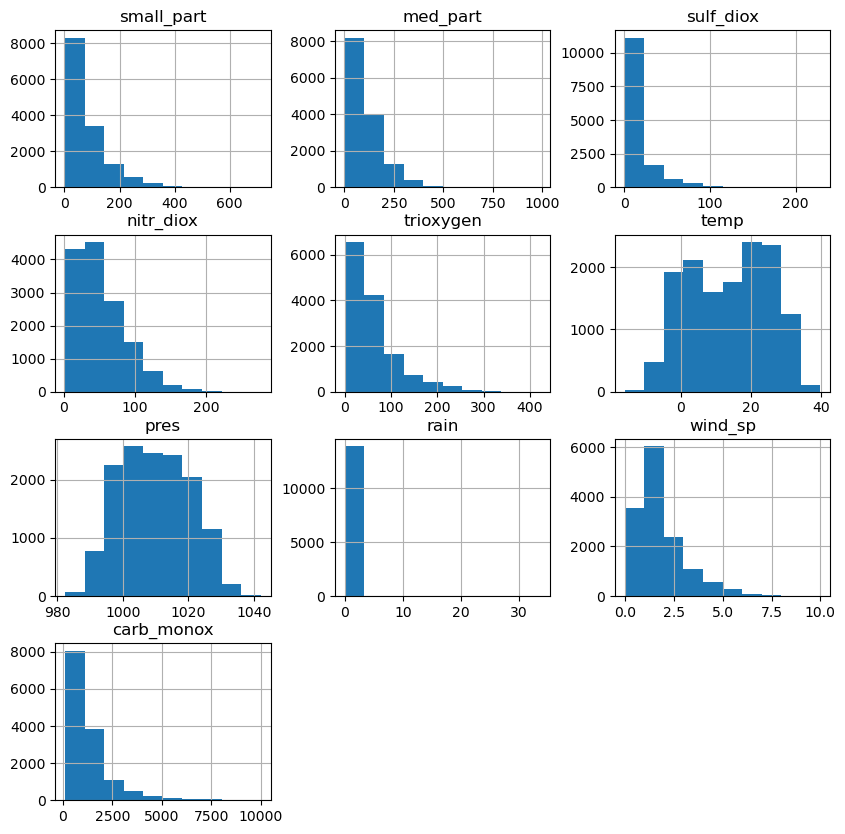

In [152]:
numerical_df.hist(figsize=(10,10))
plt.show()

The variables `small_part`, `med_part`, `sulf_diox`, `nitr_diox`, `trioxygen`, and the target variable `carb_monox` exhibit left-skewed distributions, as shown in the histograms. We will apply a log transformation to reduce skewness and make the distributions more symmetric.

In [153]:
# Apply log transformation to selected columns to reduce skewness
numerical_df['small_part_log']=numerical_df['small_part'].apply(lambda x: math.log(x+1))
numerical_df['med_part_log']=numerical_df['med_part'].apply(lambda x: math.log(x+1))
numerical_df['sulf_diox_log']=numerical_df['sulf_diox'].apply(lambda x: math.log(x+1))
numerical_df['nitr_diox_log']=numerical_df['nitr_diox'].apply(lambda x: math.log(x+1))
numerical_df['trioxygen_log']=numerical_df['trioxygen'].apply(lambda x: math.log(x+1))

numerical_df['carb_monox_log']=numerical_df['carb_monox'].apply(lambda x: math.log(x+1))

# Drop original columns that were transformed (leave only the target one)
numerical_df_log = numerical_df.drop(columns = ['small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen'])

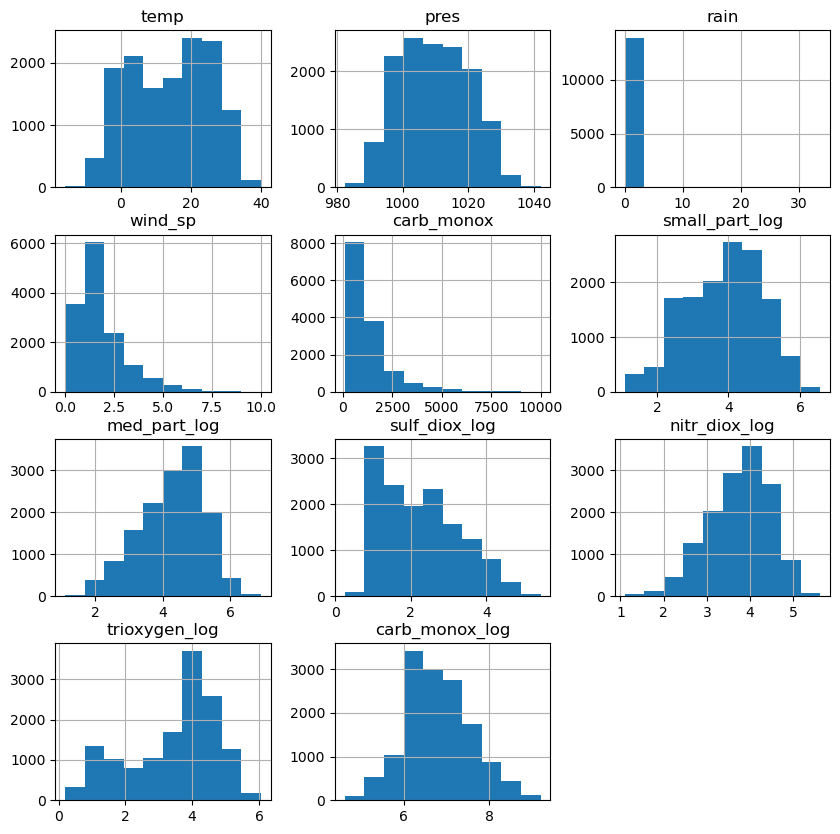

In [154]:
numerical_df_log.hist(figsize=(10,10))
plt.show()

Let's examine the correlation matrix of the numerical variables to identify relationships between them.

## Data Preparation and Splitting

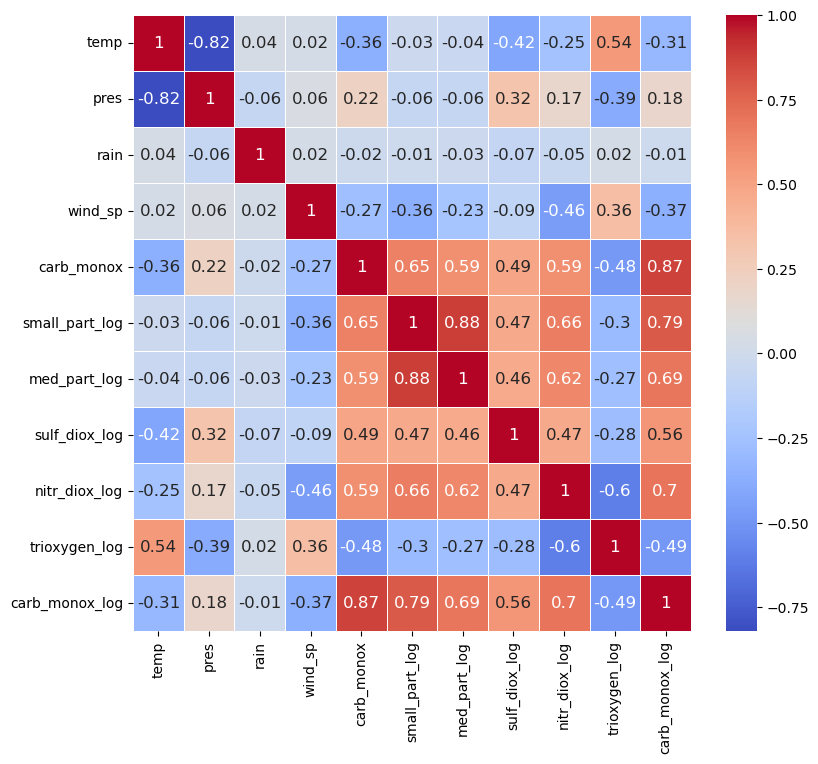

In [155]:
plt.figure(figsize = (9,8))
sns.heatmap(data=numerical_df_log.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

We observe strong correlations between `temp` and `pres`, as well as between `small_part_log` and `med_part_log`. These variables will be removed from further analysis to avoid multicollinearity.

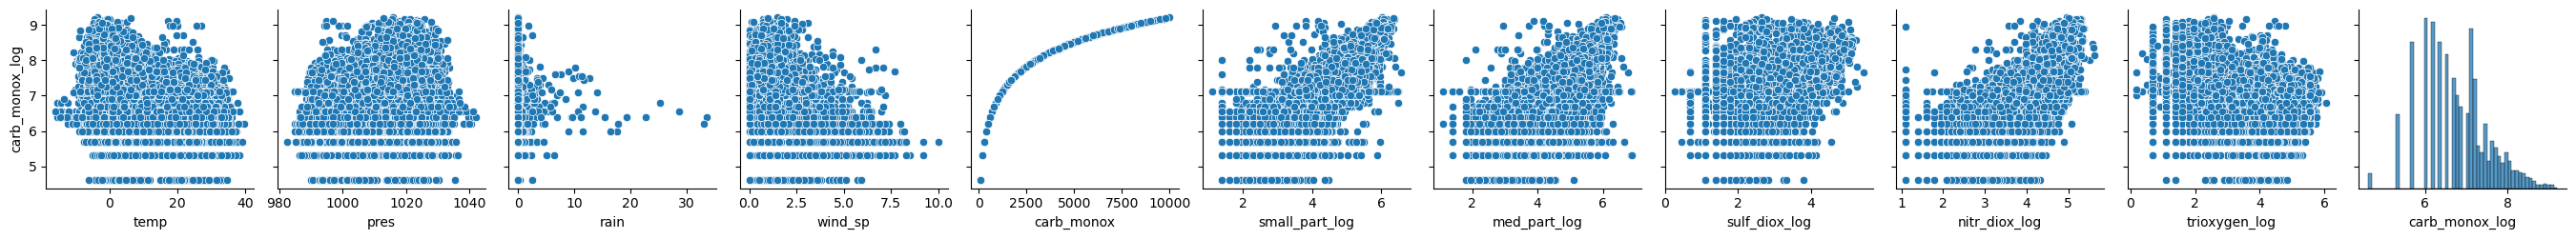

In [156]:
# Pairplot with all columns as x-axis variables and 'carb_monox_log' as the y-axis variable
sns.pairplot(numerical_df_log, x_vars=numerical_df_log.columns, y_vars='carb_monox_log')

<AxesSubplot:>

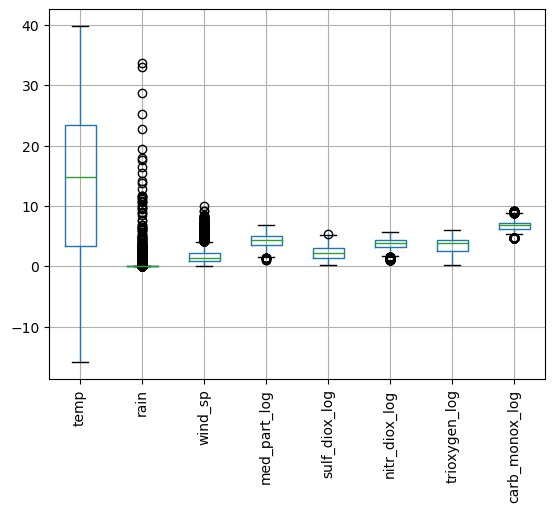

In [157]:
# Drop specified columns from the DataFrame
numerical_df_log=numerical_df_log.drop(['pres','small_part_log','carb_monox'], axis=1)

# Plot boxplot for all remaining columns
numerical_df_log.boxplot(rot = 90)

The variables have different variances. We will apply scaling to standardize them to the same scale.

<AxesSubplot:>

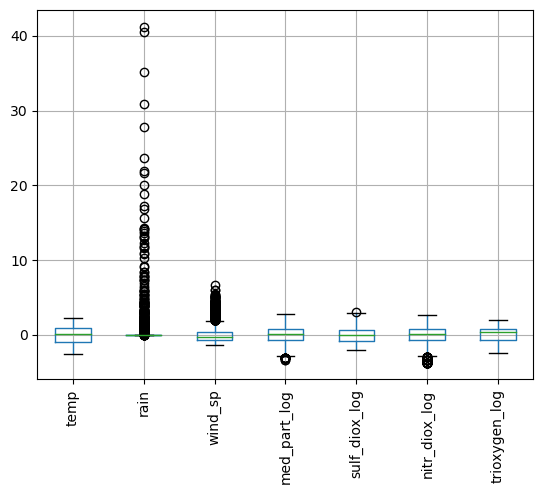

In [158]:
# Exclude the target variable from the feature set
X_numerical = numerical_df_log.drop(columns='carb_monox_log').copy()

# Standardize the feature set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_numerical)  # Fit the scaler
X_numerical_scaled = pd.DataFrame(scaler.transform(X_numerical), columns=X_numerical.columns)  # Transform and maintain column names

# Save the scaler for future use
pickle.dump(scaler, open('scaler.pkl', 'wb'))  # Saves the scaler object as 'scaler.pkl'

# Boxplot of scaled features
X_numerical_scaled.boxplot(rot=90)

The `rain` variable is heavily concentrated around 0 due to many rain-free days and only a few days with rainfall.

In [159]:
# Combine categorical dummy variables and numerical features into a single DataFrame
X=pd.concat([categorical_df_dummies,X_numerical], axis = 1)

X.head()

,wind_ENE,wind_ESE,wind_N,wind_NE,wind_NNE,wind_NNW,wind_NW,wind_S,wind_SE,wind_SSE,...,hour_7,hour_8,hour_9,temp,rain,wind_sp,med_part_log,sulf_diox_log,nitr_diox_log,trioxygen_log
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,7.6,0.0,2.5,3.784190,0.693147,2.995732,3.401197
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.7,4.753590,3.465736,4.317488,2.397895
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,29.3,0.0,0.4,4.955827,2.302585,3.784190,5.293305
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,14.2,0.0,1.9,4.649679,2.836752,3.978837,3.044522
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1.0,0.0,1.3,4.060443,3.737670,3.891820,2.833213


In [160]:
# Display the list of column names in the combined dataset
X.columns

Index(['wind_ENE', 'wind_ESE', 'wind_N', 'wind_NE', 'wind_NNE', 'wind_NNW',
       'wind_NW', 'wind_S', 'wind_SE', 'wind_SSE', 'wind_SSW', 'wind_SW',
       'wind_W', 'wind_WNW', 'wind_WSW', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'day_2', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
       'day_3', 'day_30', 'day_31', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'hour_1', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_2', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'temp',
       'rain', 'win

In [161]:
# A target variable
y = numerical_df_log['carb_monox_log']

y.head()

0    5.303305
1    7.650169
2    6.552508
3    7.109817
4    7.170888
Name: carb_monox_log, dtype: float64

Let's split our dataset into training and test sets.

In [162]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    random_state= 123)

print(X_train.shape, X_test.shape)

(9790, 90) (4197, 90)


## Model Training and Evaluation

First, let's create functions for model grid search (selection of optimal parameters) and related visualizations. 

As mentioned in the task:  
*The health department has agreed to evaluate the predictions in terms of the Mean Absolute Error (MAE).*

In [163]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV
import math


# Function for GridSearch and evaluation of regression models
def gs_regression(model, par) :
    # Perform GridSearch with cross-validation
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    # Summarize GridSearch results
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %.3f using %s" % (-gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    
    # Predict on training and test sets
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
    
    # Transform targets and predictions back to original scale
    y_train_exp=y_train.apply(lambda x: math.exp(x)-1)
    y_test_exp=y_test.apply(lambda x: math.exp(x)-1)
    y_pred_train_exp=np.exp(y_pred_train)-1
    y_pred_test_exp=np.exp(y_pred_test)-1
    
    # Print evaluation metrics 
    from sklearn import metrics
    print()
    print("MAE  train %.3f (%.3f)    test %.3f (%.3f)" % (metrics.mean_absolute_error(y_train, y_pred_train), 
                                                          metrics.mean_absolute_error(y_train_exp, y_pred_train_exp), 
                                                          metrics.mean_absolute_error(y_test, y_pred_test),  
                                                          metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)
                                                          )
          )
    
    MAE_test_orig = metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)
    
    print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), 
                                                      metrics.mean_squared_error(y_test, y_pred_test)) 
          ) 
    
    print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), 
                                                      np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) 
          ) 
    
    print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), 
                                                      metrics.r2_score(y_test, y_pred_test)) 
          )
    
    return gs.best_estimator_, MAE_test_orig


# Function to get regression coefficients
def regression_coefficients(model):
    return pd.concat([pd.DataFrame({ 'coefficient': model.intercept_}, index = ['intercept']), 
                      pd.DataFrame(model.coef_, X.columns, columns = ['coefficient'])])


# Function to plot residuals
def redidual_plot(model, sets = ""):
    if sets == "all":
        residuals = y-model.predict(X)
        plt.scatter(model.predict(X),residuals, c="b", label="all data")
    else:
        residuals = [y_train-model.predict(X_train), y_test-model.predict(X_test)]
        plt.scatter(model.predict(X_train),residuals[0], c="b", label="training data")
        plt.scatter(model.predict(X_test),residuals[1], c="g", label="hold out data")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    x_min, x_max = plt.xlim()
    plt.hlines(y=0, xmin = x_min, xmax = x_max, color="r")
    plt.legend(loc="upper left")
    plt.show()
    
    return residuals

# Function to plot feature importance
def plot_feature_importance(model):
    plt.figure(figsize = (14,8))
    sns.barplot(x=X.columns, y=model.feature_importances_, palette="Blues_d")
    plt.xticks(rotation=90)
    plt.show()

### Linear Regression

We will analyze the application of Multiple Linear Regression. This model does not involve hyperparameter tuning, so we directly apply the standardized version.

In [164]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
regressor = LinearRegression() 

# Define hyperparameters for GridSearch (empty since no hyperparameters for basic LinearRegression)
parameters = {}

# Perform GridSearch and train the Linear Regression model
linear_model, MAE_linear = gs_regression(regressor, parameters)

# Retrieve the coefficients of the trained model
linear_model_coef = regression_coefficients(linear_model)

linear_model_coef.transpose()

***GRIDSEARCH RESULTS***
Best score: 0.318 using {}

MAE  train 0.314 (364.804)    test 0.325 (368.265)
MSE  train 0.175              test 0.189
RMSE train 0.418              test 0.434
r2   train 0.725              test 0.703


,intercept,wind_ENE,wind_ESE,wind_N,wind_NE,wind_NNE,wind_NNW,wind_NW,wind_S,wind_SE,...,hour_7,hour_8,hour_9,temp,rain,wind_sp,med_part_log,sulf_diox_log,nitr_diox_log,trioxygen_log
coefficient,4.448489,-0.056058,0.036123,-0.093265,-0.089238,-0.112003,-0.050443,-0.096301,-0.031706,-0.047422,...,0.021874,0.055253,0.097073,-0.011074,0.027927,-0.077614,0.363427,0.174072,0.236644,-0.048872


### Ridge Regression

We will analyze the application of Ridge Regression, which includes a regularization parameter (alpha) to prevent overfitting.

In [165]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
regressor = Ridge()

# Define the hyperparameter grid
parameters = {"alpha": [0.001,0.01,0.1,1,10]}

# Perform GridSearch and train the Ridge model
ridge_model, MAE_ridge = gs_regression(regressor, parameters)

# Retrieve coefficients of the trained Ridge model
ridge_model_coef = regression_coefficients(ridge_model)

ridge_model_coef.transpose()

***GRIDSEARCH RESULTS***
Best score: 0.318 using {'alpha': 10}

MAE  train 0.314 (364.838)    test 0.325 (368.369)
MSE  train 0.175              test 0.189
RMSE train 0.418              test 0.434
r2   train 0.725              test 0.703


,intercept,wind_ENE,wind_ESE,wind_N,wind_NE,wind_NNE,wind_NNW,wind_NW,wind_S,wind_SE,...,hour_7,hour_8,hour_9,temp,rain,wind_sp,med_part_log,sulf_diox_log,nitr_diox_log,trioxygen_log
coefficient,4.423495,-0.041896,0.049649,-0.079713,-0.075138,-0.096954,-0.036849,-0.081197,-0.016778,-0.032457,...,0.005144,0.037655,0.078352,-0.010831,0.028114,-0.077821,0.362869,0.174133,0.23605,-0.049083


### Lasso Regression

We will analyze the application of Lasso Regression, which uses L1 regularization to enforce sparsity by shrinking some coefficients to zero.

In [166]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
regressor = Lasso()

# Define the hyperparameter grid for alpha
parameters = {"alpha": [0.001,0.01,0.1,1,10]}

# Perform GridSearch and train the Lasso model
lasso_model, MAE_lasso = gs_regression(regressor, parameters)

# Retrieve coefficients of the trained Lasso model
lasso_model_coef = regression_coefficients(lasso_model)

lasso_model_coef.transpose()

***GRIDSEARCH RESULTS***
Best score: 0.319 using {'alpha': 0.001}

MAE  train 0.315 (367.463)    test 0.325 (369.701)
MSE  train 0.177              test 0.189
RMSE train 0.421              test 0.435
r2   train 0.722              test 0.702


,intercept,wind_ENE,wind_ESE,wind_N,wind_NE,wind_NNE,wind_NNW,wind_NW,wind_S,wind_SE,...,hour_7,hour_8,hour_9,temp,rain,wind_sp,med_part_log,sulf_diox_log,nitr_diox_log,trioxygen_log
coefficient,4.383008,0.0,0.08306,-0.027524,-0.022313,-0.039491,0.0,-0.023382,0.010845,0.0,...,-0.0,0.003079,0.045014,-0.009062,0.027441,-0.077624,0.362753,0.173523,0.233023,-0.049106


### K-Nearest Neighbors Regression

We will analyze the application of K-Nearest Neighbors (KNN) regression, which predicts the target value for a data point by averaging the values of its nearest neighbors based on a specified distance metric.

**Hyperparameters for Tuning**:
- **n_neighbors**: This defines the number of neighbors to consider when making predictions.  

- **metric**: Specifies the distance metric to measure the proximity between data points.  

- **p**: The power parameter for the Minkowski distance metric.  

In [167]:
from sklearn.neighbors import KNeighborsRegressor


# Initialize the KNN regressor
regressor = KNeighborsRegressor()

# Define the hyperparameter grid for GridSearch
parameters = {'n_neighbors': np.arange(20,50,10),
              'metric': ['minkowski', 'euclidean', 'manhattan'],
              'p': [1,2]
            }

# Perform GridSearch and train the KNN model
KNN_model, MAE_KNN = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: 0.315 using {'metric': 'minkowski', 'n_neighbors': 20, 'p': 1}

MAE  train 0.289 (337.098)    test 0.310 (354.407)
MSE  train 0.148              test 0.174
RMSE train 0.385              test 0.417
r2   train 0.768              test 0.726


### Decision Tree Regression

We will analyze the application of Decision Tree Regression, a model that splits data into subsets based on feature values to make predictions.

**Hyperparameters for Tuning**:
- **max_depth**: Maximum depth of the tree.  
- **min_samples_leaf**: Minimum samples required in a leaf node.  
- **min_samples_split**: Minimum samples required to split an internal node.

In [168]:
from sklearn.tree import DecisionTreeRegressor 

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Define the hyperparameter grid for GridSearch
parameters = {"max_depth": [1, 3, 5, 10, 15, 18], 
              'min_samples_leaf': [1, 5, 6, 8],
              'min_samples_split': [2, 5, 10]
              }

# Perform GridSearch and train the Decision Tree model
tree_model, MAE_tree = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: 0.323 using {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 10}

MAE  train 0.258 (288.234)    test 0.319 (348.459)
MSE  train 0.123              test 0.189
RMSE train 0.350              test 0.434
r2   train 0.807              test 0.703


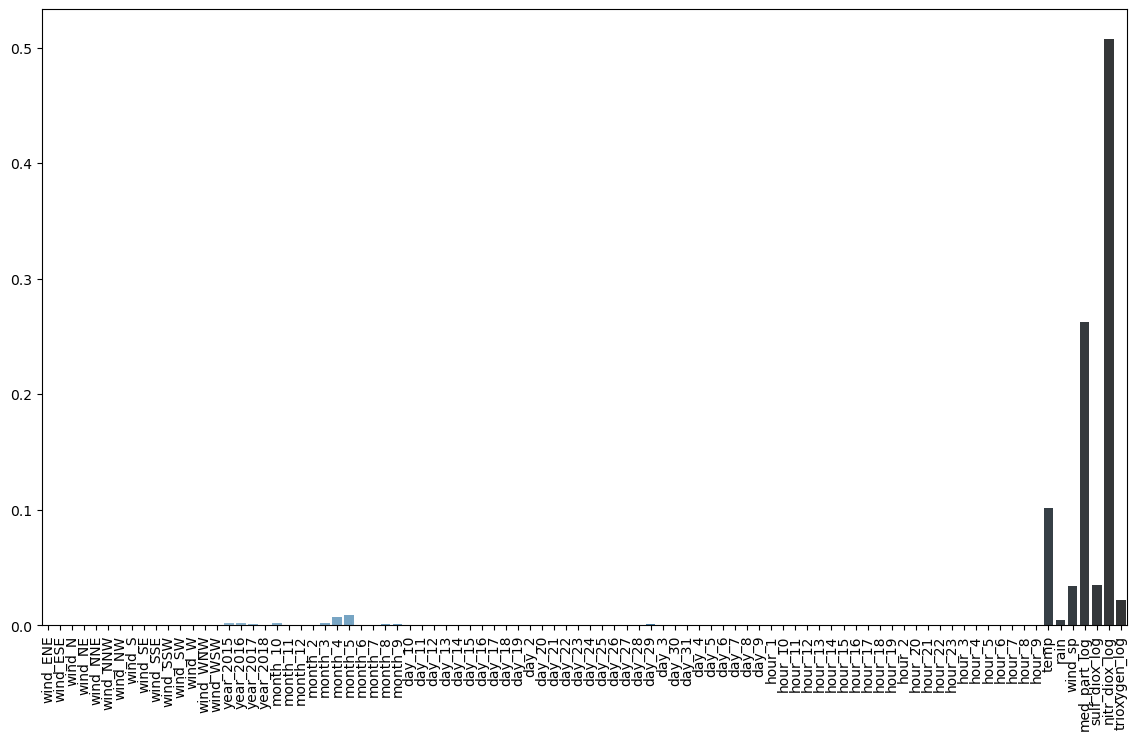

In [169]:
plot_feature_importance(tree_model)

### Support Vector Regression

Due to the high computational cost, we will use the standard linear kernel with default parameters.

In [170]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
regressor = SVR()

# Define the hyperparameter grid for GridSearch
parameters = {
    'kernel': ['linear'],
}

# Perform GridSearch and train the SVR model
SVR_model, MAE_SVR = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: 0.317 using {'kernel': 'linear'}

MAE  train 0.312 (357.075)    test 0.322 (360.011)
MSE  train 0.177              test 0.190
RMSE train 0.421              test 0.435
r2   train 0.721              test 0.702


### Multilayer Perceptron Regression

We will analyze the application of Multilayer Perceptron (MLP) Regression.

**Hyperparameters for Tuning**:
- **hidden_layer_sizes**: Architecture of the hidden layers.  
- **solver**: Optimization algorithm.  
- **batch_size**: Number of samples per batch.  
- **learning_rate**: Learning rate schedule.  
- **alpha**: Regularization term.  
- **max_iter**: Maximum iterations.


In [171]:
from sklearn.neural_network import MLPRegressor

# Initialize the MLP Regressor
regressor = MLPRegressor(random_state=0)

# Define the hyperparameter grid for GridSearch
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[5000]}

# Perform GridSearch and train the MLP model
MLP_model, MAE_MLP = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: 0.296 using {'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'sgd'}

MAE  train 0.294 (341.544)    test 0.304 (343.638)
MSE  train 0.157              test 0.173
RMSE train 0.397              test 0.416
r2   train 0.752              test 0.728


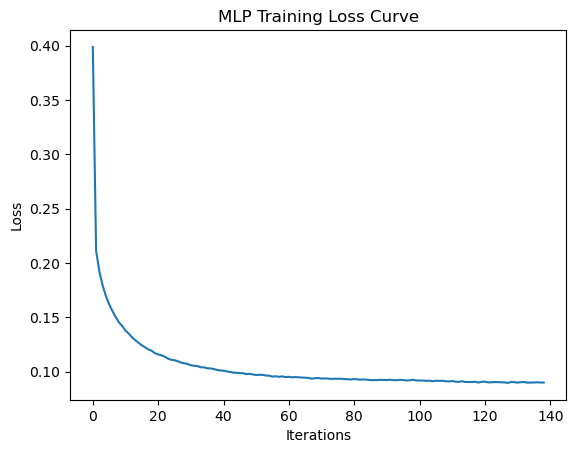

In [172]:
plt.plot(MLP_model.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.show()

### Random Forest Regression

We will analyze the application of Random Forest Regression.

**Hyperparameters for Tuning**:
- **n_estimators**: Number of trees in the forest.  
- **min_samples_leaf**: Minimum samples required in a leaf node.  
- **random_state**: Seed for reproducibility.

In [173]:
from sklearn.ensemble import RandomForestRegressor 

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor()

# Define the hyperparameter grid for GridSearch
parameters = {"n_estimators":[10,100,200], 
              "min_samples_leaf": [5,10,30], 
              "random_state" : [123]}

# Perform GridSearch and train the Random Forest model
random_forest_model, MAE_random_forest = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: 0.277 using {'min_samples_leaf': 5, 'n_estimators': 200, 'random_state': 123}

MAE  train 0.179 (207.711)    test 0.276 (304.494)
MSE  train 0.067              test 0.150
RMSE train 0.258              test 0.387
r2   train 0.895              test 0.764


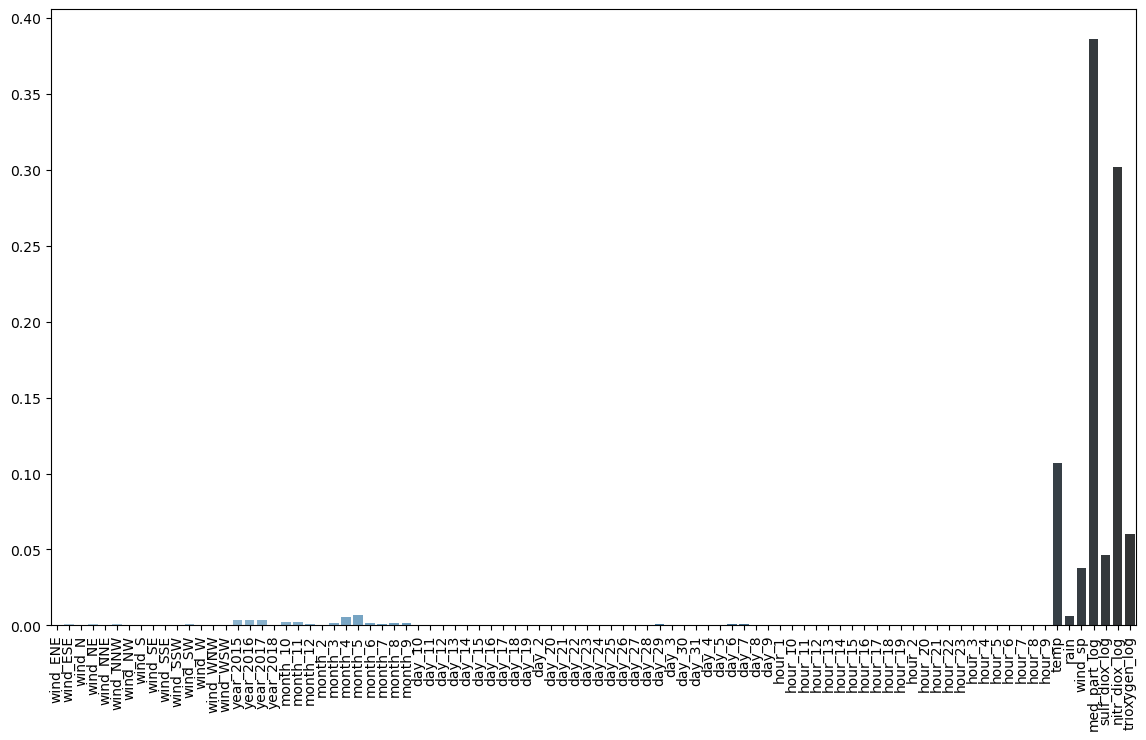

In [174]:
plot_feature_importance(random_forest_model)

### AdaBoost Regression

We will analyze the application of AdaBoost Regression.

**Hyperparameters for Tuning**:
- **n_estimators**: Number of boosting stages.  
- **learning_rate**: Weight applied to each regressor.  
- **loss**: Loss function for the weak regressors.  
- **random_state**: Seed for reproducibility.

In [175]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost Regressor
regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)

# Define the hyperparameter grid for GridSearch
parameters = {"n_estimators":[5,10,100,300], 
              "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], 
              "random_state" : [123]}

# Perform GridSearch and train the AdaBoost model
adaboost_model, MAE_adaboost = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: 0.352 using {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100, 'random_state': 123}

MAE  train 0.350 (405.818)    test 0.362 (410.748)
MSE  train 0.204              test 0.220
RMSE train 0.451              test 0.469
r2   train 0.680              test 0.654


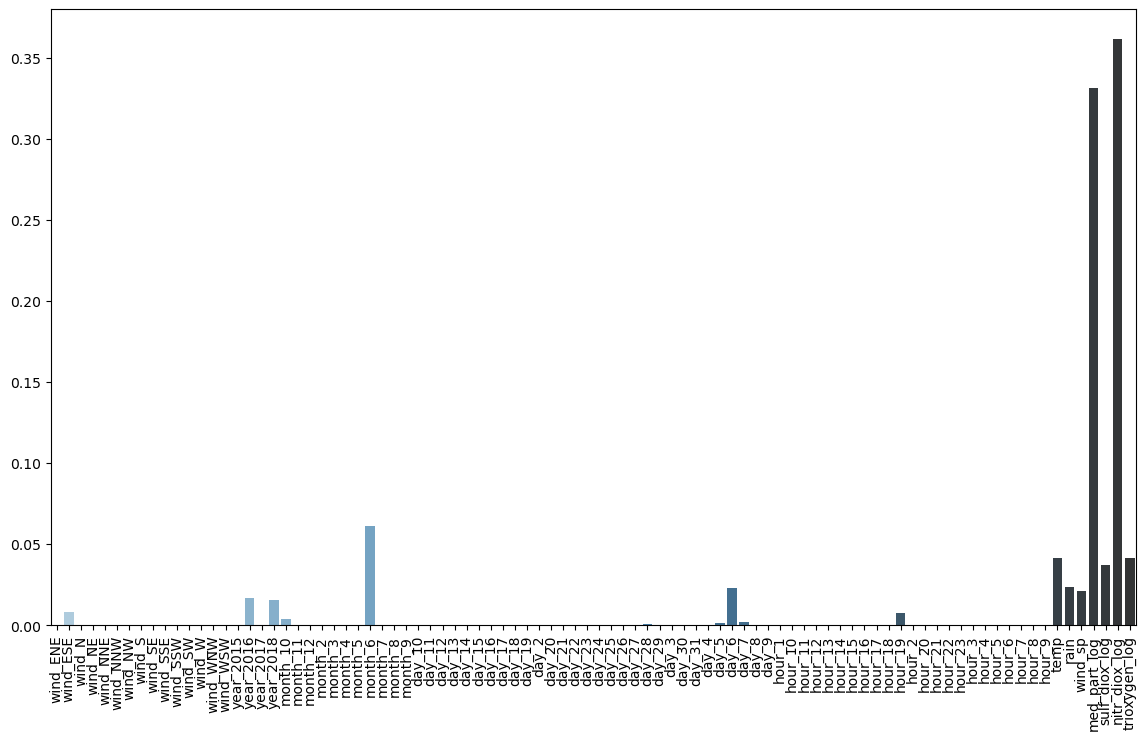

In [176]:
plot_feature_importance(adaboost_model)

### Gradient Boosting Regression

We will analyze the application of Gradient Boosting Regression.

**Hyperparameters for Tuning**:
- **n_estimators**: Number of boosting stages.  
- **learning_rate**: Step size shrinkage used in updates.  
- **random_state**: Seed for reproducibility.  
- **max_depth**: Maximum depth of individual estimators.


In [177]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
regressor = GradientBoostingRegressor() 

# Define the hyperparameter grid for GridSearch
parameters = {"n_estimators":[20,50,100],  
              "learning_rate":[0.01, 0.1,1], 
              "random_state":[123],
              "max_depth":[1,2,5]}

# Perform GridSearch and train the Gradient Boosting model
gradient_boost_model, MAE_gradient_boost = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: 0.272 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 123}

MAE  train 0.232 (261.074)    test 0.277 (303.240)
MSE  train 0.098              test 0.150
RMSE train 0.314              test 0.387
r2   train 0.845              test 0.764


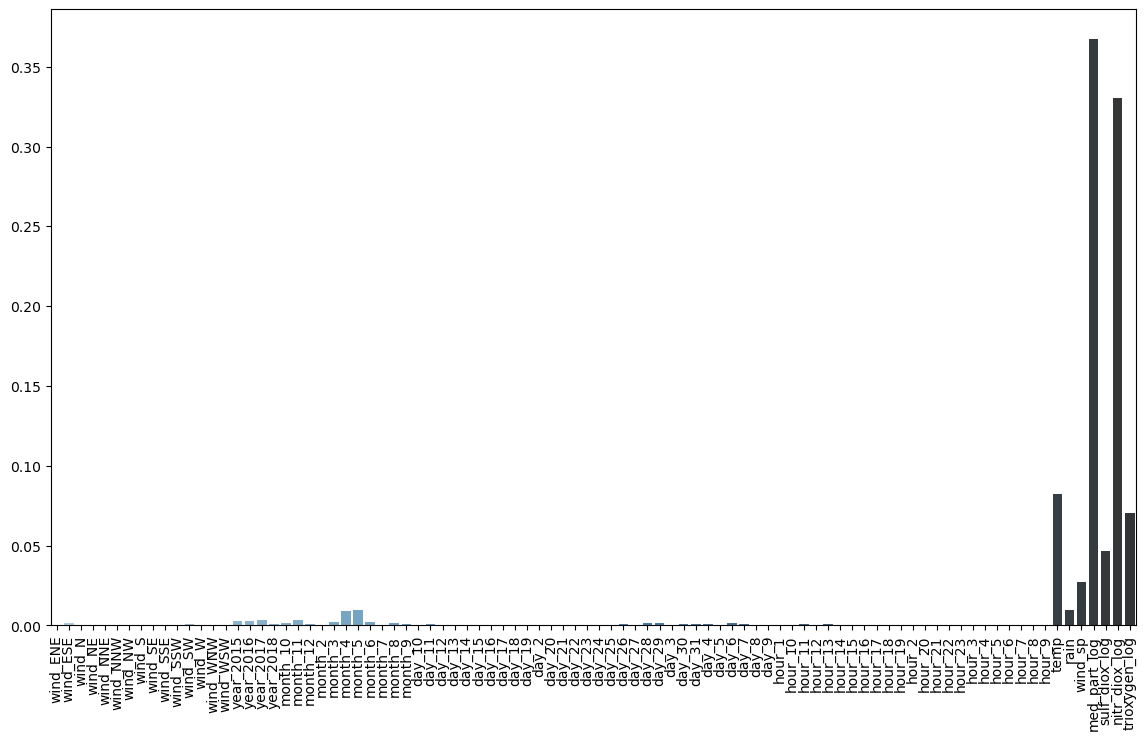

In [178]:
plot_feature_importance(gradient_boost_model)

## Model Selection

The task specifies model selection based on minimizing the Mean Absolute Error (MAE).

In [203]:
# Dictionary containing Mean Absolute Errors (MAEs) for each model
MAEs = {
    "linear": MAE_linear,
    "ridge": MAE_ridge,
    "lasso": MAE_lasso,
    "KNN": MAE_KNN,
    "tree": MAE_tree,
    "SVR": MAE_SVR,
    "MLP": MAE_MLP,
    "random forest": MAE_random_forest,
    "adaboost": MAE_adaboost,
    "gradient boost": MAE_gradient_boost
}

# Print MAEs for all models
for model, mae in MAEs.items():
    print(f"{model} : {mae:.3f}")

# Find and print the model with the minimum MAE
best_model = min(MAEs, key=MAEs.get)
print(f"\nMin MAE value ({MAEs[best_model]:.3f}) corresponds to the {best_model} model")

linear : 368.265
ridge : 368.369
lasso : 369.701
KNN : 354.407
tree : 348.459
SVR : 360.011
MLP : 343.638
random forest : 304.494
adaboost : 410.748
gradient boost : 303.240

Min MAE value (303.240) corresponds to the gradient boost model


We chose the **Gradient Boosting Regression** model to predict carbon monoxide values.

Let's visualize residuals.

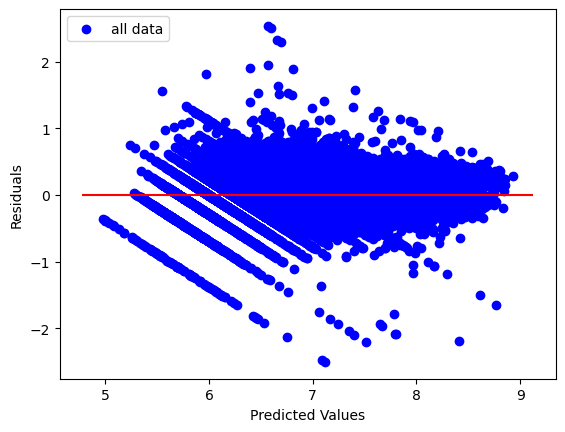

In [205]:
res = redidual_plot(gradient_boost_model, sets = "all")

The residual plot displays the residuals against the predicted values:

From observation: the residuals are scattered randomly around the horizontal axis at `0`, which indicates no clear pattern in the residuals. This suggests that the Gradient Boosting Regression model captures the relationship between the features and target variable reasonably well.

We will not check for residual normality because Gradient Boosting Regression, being a non-parametric model, does not require residuals to follow a normal distribution.

In [206]:
# Save the trained model to a file
pickle.dump(gradient_boost_model, open('gradient_boost_model.pkl', 'wb'))

## Model Interpretation

In this section, we focus on interpreting the Gradient Boosting Regression model using SHAP (SHapley Additive exPlanations).

- Using SHAP's summary plot, we identify the most influential features across the dataset and their impact on the target variable.

- For individual predictions, we use SHAP's force plot to explain how each feature contributes to the prediction for a specific instance.

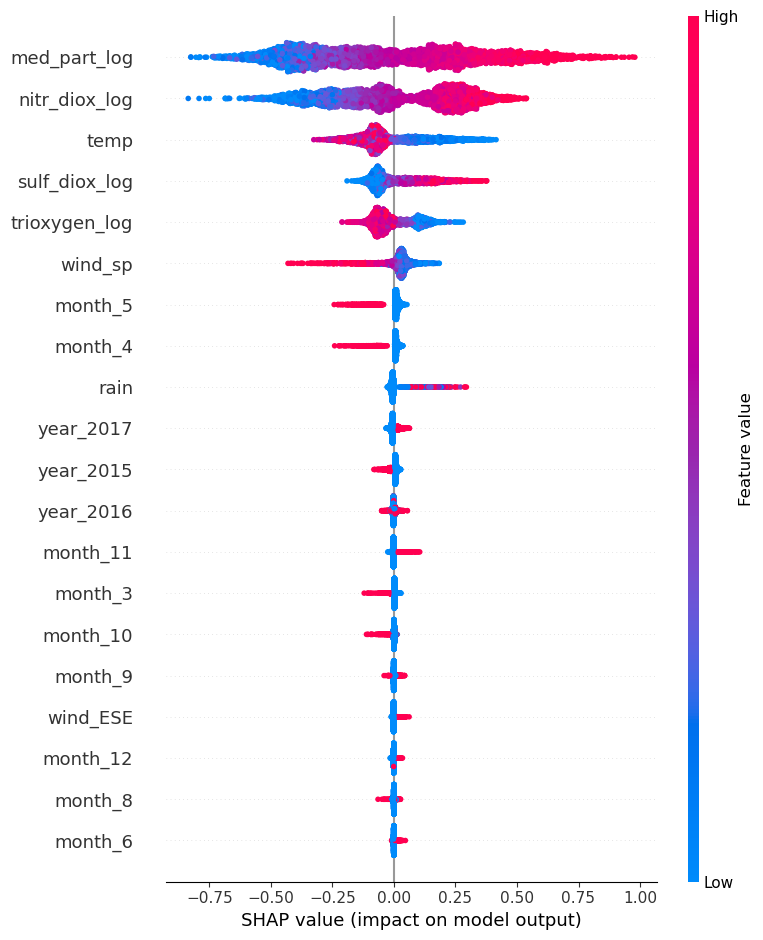

In [207]:
import shap

# Ensure DataFrames have the correct column names
df_X_train = pd.DataFrame(X_train, columns=X_train.columns)
df_X_test = pd.DataFrame(X_test, columns=X_test.columns)

# Create SHAP TreeExplainer
explainer = shap.TreeExplainer(random_forest_model)

# Calculate SHAP values for the test set (in one step)
shap_values = explainer.shap_values(df_X_test)  # Outputs a 2D array of shape (n_samples, n_features)

# Visualize SHAP Results

# Summary Plot (Global Feature Importance)
# This plot shows how important each feature is and how it impacts the model globally
shap.summary_plot(shap_values, df_X_test)

- Two of the most influential features are `med_part_log`, `nitr_diox_log`. Other numerical features like and some specific months also contribute but to a lesser extent.

- Other features show minimal impact, with SHAP values close to zero, indicating their limited role in influencing the model's predictions.

This plot provides a comprehensive view of how features influence the predictions globally. In addition, we can visualize feature importance as a simplified bar chart. This chart ranks features based on their average absolute SHAP values, providing a clearer view of their overall contribution to the model's predictions.

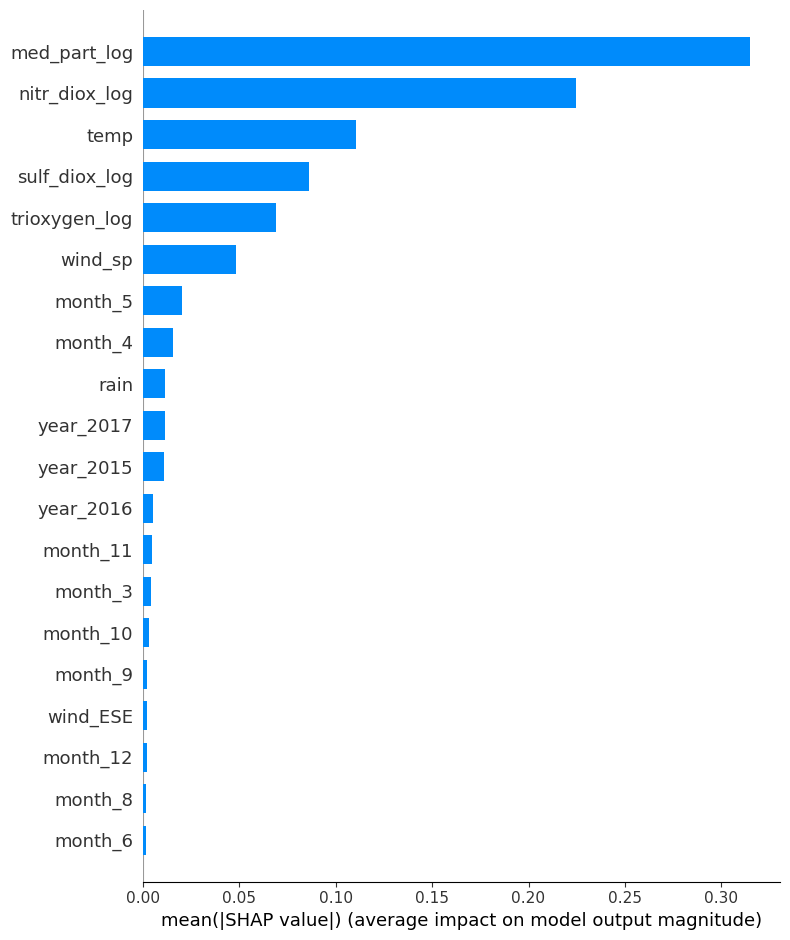

In [ ]:
# Bar Plot (Global Feature Importance - Simplified View)
# This plot ranks features by their average absolute SHAP value
shap.summary_plot(shap_values, df_X_test, plot_type="bar")

The SHAP force plot provides a detailed explanation for a specific instance by illustrating how each feature contributes to the model's prediction.

136


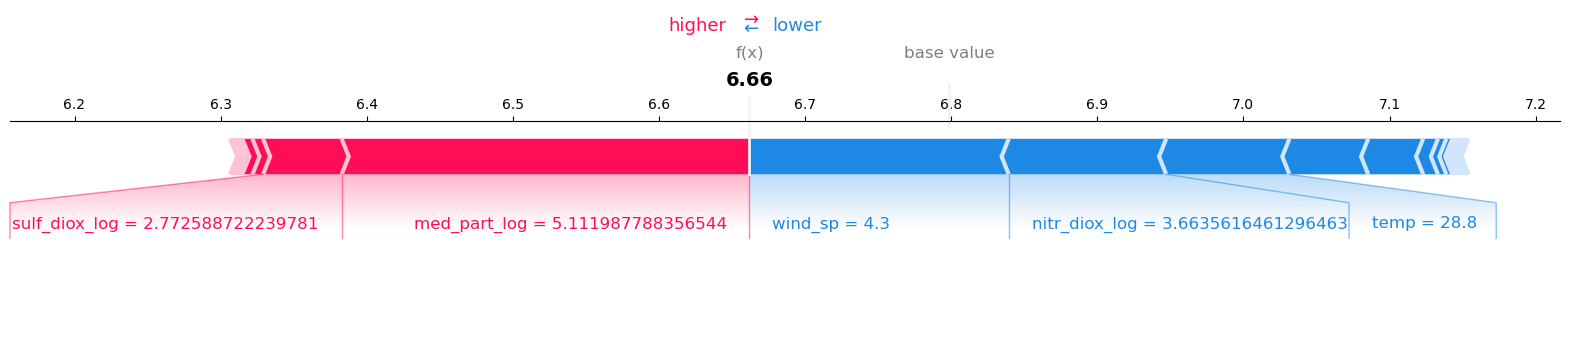

In [ ]:
np.random.seed(124)  # Set random state
instance_idx = np.random.randint(1, len(X_test) + 1) # random instance for the Force Plot

# Force Plot (Local Feature Explanation)
# A force plot provides an alternative view of local explanations
print(instance_idx)
shap.initjs()  
shap.force_plot(
    explainer.expected_value,
    shap_values[instance_idx],
    df_X_test.iloc[instance_idx],
    matplotlib=True
)

The predicted value for this instance is 6.66, influenced by:
  - Positive Contributions:
    - `sulf_diox_log` and `med_part_log` strongly push the prediction higher, indicating these features have significant positive impacts for this instance.
  - Negative Contributions:
    - `wind_sp`, `nitr_diox_log`, and `temp` counteract by reducing the prediction, showing their negative impacts.

## Future Predicions


For future predictions, the data should be preprocessed in the same manner as in this analysis:

1. **Categorical Data**:  
   - Apply one-hot encoding to all categorical variables.

2. **Logarithmic Transformation**:  
   - Log-transform the variables `small_part`, `med_part`, `sulf_diox`, `nitr_diox`, `trioxygen`, and the target variable `carb_monox`.

3. **Scaling**:  
   - Scale all numerical variables using the previously saved Standard Scaler (`scaler.pkl`).

4. **Model Usage**:  
   - Use the saved model (`gradient_boost_model.pkl`) to make predictions on the preprocessed data.